Primeiro passo importando as bibliotecas

In [2]:
import pandas as pd
import csv #importando csv
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

- A pesquisa ficou adestrita a região do vale do Jauru

- Região vale do Jauru

        Araputanga
        Figueirópolis d'Oeste
        Glória d'Oeste
        Indiavaí
        Jauru
        Lambari d'Oeste
        Mirassol d'Oeste
        Porto Esperidião
        Reserva do Cabaçal
        Rio Branco
        Salto do Céu
        São José dos Quatro Marcos


In [3]:
#PEP
cidade_link = open('src/arquivos.csv')

implementa = csv.DictReader(cidade_link)
#a leitura só funcionara com os parametros abaixo com o parametro acimas

for inplemente in implementa:
    #lendo arquivo python para rastrear o separador
    carregar_separador = open(inplemente['link'],encoding='ISO-8859-1')
    separa = csv.Sniffer().sniff(carregar_separador.read())
    separador = separa.delimiter
    print("Tipo de separador definido foi --> ", separador)
    #---------------------------------------
    #dividindo municipio para colocar na variavel de nome    
    dividi_municipio = inplemente['municipio'].split(' ')# o codigo dividi o nome do municipio
    #----------------------------------------------
    
    # Carregando csv no pandas 
    servidores = pd.read_csv(inplemente['link']#chama o arquivo csv 
                             ,sep=separador #informa o separador do arquivo
                             ,encoding='ISO-8859-1', #informa a codificação do arquivo
                             error_bad_lines=False,
                             engine='python') #trata os erros nas linhas
    nome_variavel = 'servidores_{}'.format(dividi_municipio[0])     #alterando o nome da variavel
    globals()[nome_variavel] = servidores
    globals()[nome_variavel]['Municipio'] = inplemente['municipio']
    print(nome_variavel)
    print('-------------------------')



Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ,
servidores_Figueirópolis
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Indiavaí
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Jauru
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Lambari
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Mirassol
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
-------------------------
Tipo de separador definido foi -->  ;
servidores_Porto
----------------------

- foi necessario criar uma variavel com todos os servidores dos municipios da região oeste

In [4]:
servidores_municipio_região_oeste = servidores_Lambari, servidores_Indiavaí, servidores_Jauru, servidores_Mirassol, servidores_Porto, servidores_Reserva, servidores_São, servidores_Figueirópolis,servidores_Salto, servidores_Rio, servidores_Gloria, servidores_Araputanga

In [5]:
resultado = pd.concat(servidores_municipio_região_oeste)
#salvando os dados dos servidores da região oeste em CSV
resultado.to_csv('servidores_selecionado.csv')

In [6]:
#exibindo os dados referente a região oeste 
resultado.head()

,Detalhe,Referência,Matrícula,Data Desligamento,Tipo de Contrato,Vínculo,Nome,Cargo,Cargo inicial,Proventos,Descontos,Líquido,Divisão,Subdivisão,Unidade,Categoria Funcional,Data Prevista Termino Contrato,Municipio,Data Admissão
0,NaN,Folha Mensal - Maio,195.0,NaN,Efetivo,Servidor Público Efetivo,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,"2.385,40","279,31","2.106,09",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
1,NaN,Folha Mensal - Maio,1810.0,NaN,Efetivo,Servidor Público Efetivo,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,"3.215,66","708,42","2.507,24",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAUNT.ENC.FUNDO MUNICIPAL E SAUDE - EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
2,NaN,Folha Mensal - Maio,2.0,NaN,Efetivo,Servidor Público Efetivo,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,"2.956,45","409,31","2.547,14",SEC. MUN. DE INFRA ESTRUTURA,DPTO DE VIACAO E OBRAS,MANUT.ENC. SEC MUN. DE INFRA ESTRUTURA-EFETIVO,EFETIVO,NaN,Lambari D'Oeste,NaN
3,NaN,Folha Mensal - Maio,267.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,"1.600,00","134,97","1.465,03",SECRETARIA MUNICIPAL DE SAUDE,FUNDO MUNICIPAL DE SAUDE,MAN.PROG. AGENTES COMUNIT DE SAUDE-PACS - CONT...,CONTRATADO,NaN,Lambari D'Oeste,NaN
4,NaN,Folha Mensal - Maio,2318.0,NaN,Contrato Temporário,Contrato Prazo Determ. (RJU),ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,"772,58","57,94","714,64",SEC. MUN. DE EDUCACAO E CULTURA,FUNDEB,MANUT. FUNDEB 60% CONTRATADO,CONTRATADO,NaN,Lambari D'Oeste,NaN


In [7]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
resultado.head()

,Nome,Cargo,Cargo inicial,Municipio
0,ADIR DE SOUZA LEITE,FISCAL SANITARIO,FISCAL SANITARIO,Lambari D'Oeste
1,ADRIANA APARECIDA LUIZ SEGANTINI,TECNICO EM ENFERMAGEM,TECNICO EM ENFERMAGEM,Lambari D'Oeste
2,AILTON ALMEIDA PEREIRA,OPERADOR DE MAQUINAS,OPERADOR DE MAQUINAS,Lambari D'Oeste
3,ALDAIR DIAS MARTINS,AGENTE COMUNITARIO DE SAUDE,AGENTE COMUNITARIO DE SAUDE,Lambari D'Oeste
4,ALINE BATISTA DE SOUZA,PROFESSOR NIVEL SUPERIOR-06 H,PROFESSOR NIVEL SUPERIOR-06 H,Lambari D'Oeste


# Objetivo
- Baixar dados do auxilio de forma descentralizada

#### FONTE DE DADOS
- SITE BRASIL IO 
* https://brasil.io/dataset/govbr/auxilio_emergencial/

#### METODO
- baixar os dados por municipios e salvar
- **DIFICULDADES**
    - O ARQUIVO VINHA COM MASCARA ENTÃO ORDENOU POR NUMERO PARA IMPLEMENTAR UMA BUSCA COM O FOR 

Implementando codigo para unir dados baixados do site brasil io

In [8]:
for i in range(1,12):
    print('df'+str(i))
    df = pd.read_csv("src/dados_brasil_io/govbr-{}.csv".format(i))
    nome_variavel = 'df{}'.format(i)
    globals()[nome_variavel] = df

df1
df2
df3
df4
df5
df6
df7
df8
df9
df10
df11


**Unindo os dataframes**

In [9]:
auxilio_emergencial = df1, df2, df3, df4, df5, df6, df7, df8, df9, df10 ,df11
auxilio_emergencial_vale_jauru = pd.concat(auxilio_emergencial)

In [10]:
auxilio_emergencial_vale_jauru

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,beneficiario,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,202004,MT,Rio Branco,NaN,***923871**,ZENAIDE VITTORAZZI RIOS,-2,NaN,NaN,EXTRA CADUN,1,1200.0
1296,202004,MT,Rio Branco,2.041920e+10,***364651**,ZENILDA MARQUES DE OLIVEIRA,20419196956,***364651**,ZENILDA MARQUES DE OLIVEIRA,BOLSA FAMILIA,1,600.0
1297,202004,MT,Rio Branco,2.041919e+10,***969521**,ZILDA ANDRADE DE ASSIS,20419186373,***969521**,ZILDA ANDRADE DE ASSIS,BOLSA FAMILIA,1,1200.0
1298,202004,MT,Rio Branco,2.092871e+10,***295061**,ZILDA SANTOS DE OLIVEIRA,-2,NaN,NaN,CADUN NAO BOLSA,1,600.0


In [11]:
auxilio_emergencial_vale_jauru = auxilio_emergencial_vale_jauru.rename(columns={'beneficiario':'Nome'})
auxilio_emergencial_vale_jauru.head()

,ano_mes,uf,municipio,nis_beneficiario,cpf_beneficiario,Nome,nis_responsavel,cpf_responsavel,responsavel,enquadramento,parcela,valor
0,202005,MT,Indiavaí,NaN,***200171**,ADELSON GOMES SILVA,-2,NaN,NaN,EXTRA CADUN,1,600.0
1,202005,MT,Indiavaí,NaN,***397728**,ALINE DIAS MAGALHAES,-2,NaN,NaN,EXTRA CADUN,1,600.0
2,202005,MT,Indiavaí,NaN,***996641**,ANA PAULA DA SILVA PRATES,-2,NaN,NaN,EXTRA CADUN,1,600.0
3,202005,MT,Indiavaí,NaN,***040361**,ANDERSON AUGUSTO DOS SANTOS,-2,NaN,NaN,EXTRA CADUN,1,600.0
4,202005,MT,Indiavaí,NaN,***887201**,ANDREIA PIRES BORGES,-2,NaN,NaN,EXTRA CADUN,1,1200.0


In [12]:
# Objetivo ->    Separando os dados desejados
# Motivo   ->    A tabela estava muito populada com dados que não eram necessarios
# Ação     ->    Ver quais tabelas são necessarias e isolar somente a elas    
resultado = resultado[['Nome', 'Cargo', 'Cargo inicial', 'Municipio']]
auxilio_emergencial_vale_jauru_trat =auxilio_emergencial_vale_jauru[['municipio', 'cpf_beneficiario', 'enquadramento', 'Nome']]

In [13]:
ser_rec_aux = auxilio_emergencial_vale_jauru_trat.merge(resultado, on='Nome')

In [14]:
ser_rec_aux.head(60)

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
2,Indiavaí,***692341**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
3,São José dos Quatro Marcos,***553991**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
4,São José dos Quatro Marcos,***791901**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
5,São José dos Quatro Marcos,***867011**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
6,Mirassol d'Oeste,***804311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
7,Jauru,***107941**,BOLSA FAMILIA,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
8,Jauru,***964311**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu
9,Lambari D'Oeste,***039574**,EXTRA CADUN,JOSE CARLOS DA SILVA,GUARDA NOTURNO,GUARDA NOTURNO,Salto do Céu


In [15]:
ser_rec_aux.to_csv('servidores_auxilio.csv')

# Observações
- Conforme observa-se na busca há servidores que tem mesmo nome (homonimos) em diversas Unidade Gestoras dessa forma faz-se necessario fazer uma comparação no mesmo municipio.
- tem como objetivo isolar servidores pelo municipio que mesmo recebeu o auxilio e assim poder realmente comparar.
- Há formula abaixo não evita homonimos mas minimiza 

In [16]:
# Abreviatura
# ser_rec_aux_mun  = Servidores que receberan Auxilio Emergencial por municipio
ser_rec_aux_mun = ser_rec_aux[ser_rec_aux['municipio'] == ser_rec_aux['Municipio']]
ser_rec_aux_mun.head()


,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [17]:
ser_rec_aux_mun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 254
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         139 non-null    object
 1   cpf_beneficiario  139 non-null    object
 2   enquadramento     139 non-null    object
 3   Nome              139 non-null    object
 4   Cargo             139 non-null    object
 5   Cargo inicial     139 non-null    object
 6   Municipio         139 non-null    object
dtypes: object(7)
memory usage: 8.7+ KB


In [18]:
ser_rec_aux_mun.head()

,municipio,cpf_beneficiario,enquadramento,Nome,Cargo,Cargo inicial,Municipio
0,Indiavaí,***200171**,EXTRA CADUN,ADELSON GOMES SILVA,ASSESSOR SUPERIOR I,ASSESSOR SUPERIOR I,Indiavaí
1,Indiavaí,***193421**,CADUN NAO BOLSA,EDILSON SOARES DE SOUZA,Gerencia de Cultura e Turismo,Gerencia de Cultura e Turismo,Indiavaí
10,Indiavaí,***361201**,CADUN NAO BOLSA,REGINA DOS SANTOS JACINTO,CONSELHEIRO TUTELAR,CONSELHEIRO TUTELAR,Indiavaí
11,Porto Esperidião,***512091**,EXTRA CADUN,ELIMARA TOSSUE SOARES,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR - NIVEL I - ENS.MEDIO,Porto Esperidião
12,Porto Esperidião,***086441**,EXTRA CADUN,JOSE VANDER URUPE MASSAVI,PROFESSOR - NIVEL I - ENS.MEDIO,PROFESSOR DE NIVEL I,Porto Esperidião


In [19]:
dados_municipio = ser_rec_aux_mun['Municipio'].str.get_dummies().sum().sort_values(ascending=False)
dados_municipio

Porto Esperidião              39
Araputanga                    29
Mirassol d'Oeste              15
Figueirópolis D'Oeste         15
Lambari D'Oeste               13
Jauru                         13
São José dos Quatro Marcos     8
Salto do Céu                   4
Indiavaí                       3
dtype: int64

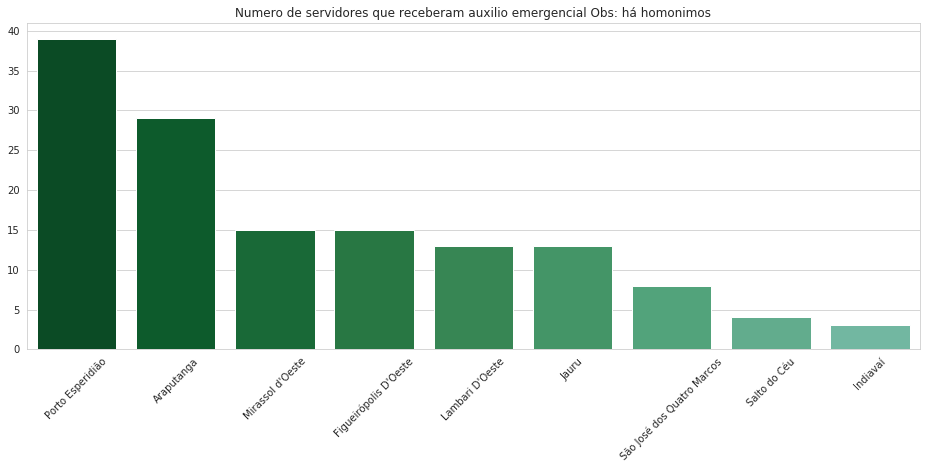

In [27]:
sns.set_style('whitegrid')# Adciona o grid ao fundo
plt.figure(figsize=(16, 6))#Coloca o tamanho da figura ;
plt.xticks(rotation=45)#rotacionado ticks a 45 grau desafio 01 aula 02

sns.barplot(x=dados_municipio.index,
            y=dados_municipio.values,
           palette=sns.color_palette('BuGn_r', n_colors=len(dados_municipio)+8))#cor da palete

plt.title("Numero de servidores que receberam auxilio emergencial Obs: há homonimos")
plt.axis()
plt.savefig("analise com homonimos.svg", format='svg', dpi=1200)
plt.show()

# _________________________________________
## Objetivo pegar os dados dos municipios com base nos nomes registrados no TCE-MT e do IPEA 
- NÃO FOI ENCONTRADO NENHUMA BASE DE DADOS ONDE E POSSIVEL CORRELACIONAR O CODIGO DO IBGE COM OS DADOS DOS CODIGOS DO TCE.
- TODAVIA É POSSIVEL ISOLAR A AREA PELO NOME DO TCE E CRIAR UMA TABELA DE CORRELAÇÃO PELO NOME
    - Metodo - implementar correlação somente para região oeste, assimm buscou dados de correlação de região sendo possivel achalas no site do IPEA no site:https://www.ipea.gov.br/ipeageo/bases.html
        - baixei os dados referente ao estado de Mato Grosso - MT em formato excel
    - Para pegar os nomes cadastrado no site do Tribunal de Contas do Estado de Mato Grosso, a busca deu-se no link https://servicos.tce.mt.gov.br/tabela-interna
        - Baixei as tabelas:
            - ***MUNICIPIO_MT*** - Cadastro dos municipios de Mato Grosso
            - ***TIPO_ENTIDADE*** - cadastro de tipo de unidade Gestora
            - ***UG*** - Unidades Gestoras Cadastradas
            

In [ ]:
# Carregando e exibindo dados dos Municipios de Mato Grosso (MT)
df_municiopios_mt = pd.read_csv('src/dados_tce_mt/APLIC/MUNICIPIO_MT.csv', sep=';')
df_municiopios_mt.head()

In [ ]:
# Carregando dados de Mato grosso 
# -----------Comentarios necessarios---------------
# - Tabelas Excel normamente vem com abas nomeada assim foi necessario verificar a que melhor atendia aos
#   quesistos a ser levantado esse nome é lançado no campo sheet_name
#---------------------------------------------------
df_dados_ipea = pd.read_excel('src/dados_ipea/MT_Mun97_region.xls', sheet_name='PIB  municipal (2010)')
df_dados_ipea 

In [ ]:
#tratando e selecionando somente os dadnos necessarios da tabela do IPEA
df_dados_ipea = df_dados_ipea[['Código IBGE do Município', 'Código IBGE da Microregião','Nome da Microregião']]
df_dados_ipea

In [ ]:
#selecionando dados do vale do Jauru
df_dados_ipea = df_dados_ipea[df_dados_ipea['Nome da Microregião']== 'Jauru']
df_dados_ipea

In [ ]:
df_dados_ipea = df_dados_ipea.rename(columns={'Código IBGE do Município':'MUN_CODIGO'})
df_dados_ipea

In [ ]:
df_municiopios_mt.info()

In [ ]:
df_dados_ipea.info()

In [ ]:
#df_municiopios_mt['MUN_CODIGO'] = df_municiopios_mt['MUN_CODIGO'].fillna(0.0).astype(int)
#df_municiopios_mt.info()

In [ ]:
df_municiopios_mt.head()

In [ ]:
df_municiopios_mt[df_municiopios_mt['MUN_NOME'] == 'JAURU']

In [ ]:
df_municipios_com_id = df_municiopios_mt.merge(df_dados_ipea, on='MUN_CODIGO')

In [ ]:
df_municipios_com_id = df_municipios_com_id[['MUN_CODIGO', 'Nome da Microregião','MUN_NOME', 'GENTILICO']]
df_municipios_com_id.head()

In [ ]:
df_ug_tce = pd.read_csv('src/dados_tce_mt/APLIC/UG.csv', sep=';')
df_ug_tce.head(60)

In [ ]:
dados_jose = pd.read_excel('src/dados_tce_mt/Leandro DSA.xlsx')
dados_jose

In [ ]:
selecionando_municipios = df_municipios_com_id.merge(dados_jose, on='MUN_CODIGO')
selecionando_municipios

In [ ]:
#isolando somente as prefeituras
prefeitura_nome = []
for x in selecionando_municipios['ENT_NOME']:
    prefeitura = x.count('PREFEITURA')
    if prefeitura != 0:
        #print(x)
        prefeitura_nome.append(x)
            
prefeitura_nome
prefeituras = pd.DataFrame(prefeitura_nome,columns=['ENT_NOME'])

In [ ]:
seleciona_prefeitura = selecionando_municipios.merge(prefeituras, on='ENT_NOME')
seleciona_prefeitura.to_csv('src/municipios.csv')
seleciona_prefeitura

# Implementando busca automatizada no site do Tribunal de Contas do Estado de Mato Grosso na parte de pessoal 
- site: https://cidadao.tce.mt.gov.br/pessoal
- Pois lá tem parte do CPF que pode ser consultada
 <img src='src/img/Screenshot_2020-07-23 TCEMT Espaço do Cidadão - Pessoal.png'>

In [ ]:
# Durante pesquisa foi possivel verificar que o Tribunal de Contas do Estado de 
# Mato Grosso tem dados de 2011 a 2020
# Solução implementar um range de 2011 a 2021
# Lembrando que python sempre le um numero  a menos que informado pois a contagem inicia em 0
ato_pessoal_tce_anos = list(range(2011,2021))
print(ato_pessoal_tce_anos)


In [ ]:
#definindo url
url = 'https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio=2011&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio=510125&ent_codigo=1121375&lotacao='

In [ ]:
def dados_orgao(soup):
    orgao = soup.h2.text
    orgao = orgao.split('-') #separando dados e pegando somente o elemnto desejado
    orgao = orgao[1]
    
    return orgão

In [ ]:
def dados_servidor(soup):
    for tabela in soup.find_all(class_="container_left"):
        servidor = tabela.find('h4').text
        servidor_salvo = ['']
        servidor_salvo = servidor_salvo.append(servidor)
    
    return servidor_salvo

In [ ]:
def dados_cpf(soup):
    for a in soup.find_all(class_="bt bt_azul"):
        link = a['href']

    return link

In [ ]:
municipios = 'src/municipios.csv'

#Abrindo tabela com dados do estado referente a UG e o Codigo do TCE-MT
with open(municipios) as f:
    reader = csv.reader(f)
    next(reader)#pulando primeira linha com cabeçalho
    for row in reader:#implementando for
        print('--------------------------------------------------------------------------------')
        print(row[6])
        
        
        #pesquisa no site do Tribunal de contas do estado de Mato Grosso 
        # Aba cidadão pessoal
        for x in ato_pessoal_tce_anos:
            r = requests.get('https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio={}&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio={}&ent_codigo={}&lotacao='.format(x,row[1],row[5]))
            print('------------------------------------------------------')
            print(x)
            print('------------------------------------------------------')

            #print(r)
            
            
            soup = BeautifulSoup(r.content, 'html.parser')
            
            dados_orgao(soup)
            dados_servidor(soup)
            
            print(servidor_salvo)
            #pegando dados referente a unidade gestora | Prefeituralllll

In [ ]:
municipios = 'src/municipios.csv'

#Abrindo tabela com dados do estado referente a UG e o Codigo do TCE-MT
with open(municipios) as f:
    reader = csv.reader(f)
    next(reader)#pulando primeira linha com cabeçalho
    for row in reader:#implementando for
        print('--------------------------------------------------------------------------------')
        print(row[6])
        
        
        #pesquisa no site do Tribunal de contas do estado de Mato Grosso 
        # Aba cidadão pessoal
        for x in ato_pessoal_tce_anos:
            r = requests.get('https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio={}&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio={}&ent_codigo={}&lotacao='.format(x,row[1],row[5]))
            print('------------------------------------------------------')
            print(x)
            print('------------------------------------------------------')

            #print(r)
            
            
            soup = BeautifulSoup(r.content, 'html.parser')
            
            
            #pegando dados referente a unidade gestora | Prefeitura
            orgao = soup.h2.text
            orgao = orgao.split('-') #separando dados e pegando somente o elemnto desejado
            orgao = orgao[1]
            
            
            # Pegando dados referente ao nome do servidor
            for tabela in soup.find_all(class_="container_left"):
                servidor = tabela.find('h4').text
                
                
                #pegando os links de reencaminhamento para dados com cpf               
                for a in soup.find_all(class_="bt bt_azul"):
                    link = a['href']
                    
                    indice = 0
                    while indice == 0:
                        cpf_url = 'https://cidadao.tce.mt.gov.br'+link
                        resposta_cpf_url = requests.get(cpf_url)
                        resposta_cpf_url.content
                        soup_cpf = BeautifulSoup(resposta_cpf_url.content, 'html.parser')
                        atos_pessoal = soup_cpf.find('fieldset')
                        dados_servidores = atos_pessoal.getText()

                        dados_servidores_separados = dados_servidores.split('\n') # Separando com base na quebra de linha
                        separa_cpf = dados_servidores_separados[2].split(':')#Separando os dados pelos dois pontos
                        cpf_servidor = separa_cpf[1].lstrip(' ')# (lstrip) Removendo espaço em branco
                        indice += 1
                        print(indice)
                    #cpf_servidor
                    #print(link)
                    
                    
                    #Pegando o desligamento do servidor
                    container_direita = soup.find_all(class_="container_right")
                    for p in container_direita:
                        desligamento = p.find_all('p')[1]
                        desligamento_texto = desligamento.text
                    
                    
                    #salvando arquivo em Csv
                    #dados_servidores_vale_jauru_tce = open("TCE-MT_vale_jauru.csv", "r")
                    print(x, servidor, orgao, link, desligamento_texto)



In [ ]:
print(i)

In [ ]:
municipios = 'src/municipios.csv'

#Abrindo tabela com dados do estado referente a UG e o Codigo do TCE-MT
with open(municipios) as f:
    reader = csv.reader(f)
    next(reader)#pulando primeira linha com cabeçalho
    for row in reader:#implementando for
        print('--------------------------------------------------------------------------------')
        print(row[6])
        
        
        #pesquisa no site do Tribunal de contas do estado de Mato Grosso 
        # Aba cidadão pessoal
        for x in ato_pessoal_tce_anos:
            r = requests.get('https://cidadao.tce.mt.gov.br/pessoal/lista?exercicio={}&situacao=situacao[]%3DEFETIVO%26situacao[]%3DELETIVO%26situacao[]%3DLIVRE%2BNOMEA%25C7%25C3O%2BE%2BEXONERA%25C7%25C3O&municipio={}&ent_codigo={}&lotacao='.format(x,row[1],row[5]))
            print('------------------------------------------------------')
            print(x)
            print('------------------------------------------------------')

            #print(r)
            
            
            soup = BeautifulSoup(r.content, 'html.parser')
            
            
            #pegando dados referente a unidade gestora | Prefeitura
            orgao = soup.h2.text
            orgao = orgao.split('-') #separando dados e pegando somente o elemnto desejado
            orgao = orgao[1]
            
            
            # Pegando dados referente ao nome do servidor
           
                

            #pegando os links de reencaminhamento para dados com cpf               
            for a in soup.find_all(class_="bt bt_azul"):
                link = a['href']

                soup.find_all(class_="container_left")
                servidor = tabela.find('h4').text

                indice = 0
                while indice == 0:
                    cpf_url = 'https://cidadao.tce.mt.gov.br'+link
                    resposta_cpf_url = requests.get(cpf_url)
                    resposta_cpf_url.content
                    soup_cpf = BeautifulSoup(resposta_cpf_url.content, 'html.parser')
                    atos_pessoal = soup_cpf.find('fieldset')
                    dados_servidores = atos_pessoal.getText()

                    dados_servidores_separados = dados_servidores.split('\n') # Separando com base na quebra de linha
                    separa_cpf = dados_servidores_separados[2].split(':')#Separando os dados pelos dois pontos
                    cpf_servidor = separa_cpf[1].lstrip(' ')# (lstrip) Removendo espaço em branco
                    indice += 1
                    #print(indice)
                #cpf_servidor
                #print(link)


                #Pegando o desligamento do servidor
                container_direita = soup.find(class_="container_right")
                desligamento = container_direita.find_all('p')[1]
                desligamento_texto = desligamento.text


                #salvando arquivo em Csv
                #dados_servidores_vale_jauru_tce = open("TCE-MT_vale_jauru.csv", "r")
                
                print(x, servidor, orgao, cpf_servidor, desligamento_texto)



In [ ]:
cpf_url = 'https://cidadao.tce.mt.gov.br'+link
resposta_cpf_url = requests.get(cpf_url)
resposta_cpf_url.content
soup_cpf = BeautifulSoup(resposta_cpf_url.content, 'html.parser')
atos_pessoal = soup_cpf.find('fieldset')
dados_servidores = atos_pessoal.getText()

dados_servidores_separados = dados_servidores.split('\n') # Separando com base na quebra de linha
separa_cpf = dados_servidores_separados[2].split(':')#Separando os dados pelos dois pontos
cpf_servidor = separa_cpf[1].lstrip(' ')# (lstrip) Removendo espaço em branco
cpf_servidor

In [ ]:
dataframetce[1]

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')
#print(soup.prettify())

In [ ]:
for tabela in soup.find_all(id="miolo"):
    print(tabela)

In [ ]:
for a in soup.find_all(class_="bt bt_azul"):
    link = a['href']
    print(link)

In [ ]:
# Separando dados por unidade gestora

orgao = soup.h2.text
orgao = orgao.split('-') #separando dados e pegando somente o elemnto desejado
              
for tabela in soup.find_all(class_="container_left"):
    servidor = tabela.find('h4').text
    print(servidor,"|",orgao[1])

In [ ]:
container_direita = soup.find_all(class_="container_right")
for p in container_direita:
    desligamento = p.find_all('p')[1]
    desligamento_texto = desligamento.text

In [ ]:
tce_cidadão_link = 'https://cidadao.tce.mt.gov.br'+link
x = requests.get(tce_cidadão_link)

In [ ]:
soupII = BeautifulSoup(x.content, 'html.parser')

In [ ]:
atopessoal = []
atos_pessoal = soupII.find('fieldset')
dados_servidores = atos_pessoal.getText()
atopessoal = atopessoal.append(dados_servidores)
print(atopessoal)

In [ ]:
soupII.get_text()

In [ ]:
ser_rec_aux_mun[ser_rec_aux_mun['municipio']==  "Figueirópolis D'Oeste"]

In [ ]:
tce_cidadão_link

In [ ]:
r.text

In [ ]:
for linha in orgao:
    posicao = len('-')
    print(linha)
    
posicao